In [1]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'figure.dpi': 400
})

In [3]:
WORK_DIR = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/parabolische_inverse_probleme')
#WORK_DIR = Path('/home/benedikt/Dokumente/parabolische_inverse_probleme')

method = 'TR_IRGNM'
#method = 'FOM_IRGNM'
dump_path = WORK_DIR / Path('examples/reaction/dumps') / f'20250324_141241_TR_IRGNM'
#dump_path = WORK_DIR / Path('experiments/corrected_norm_full_timedep') / f'diffusion_FOM_300'

setup_path = dump_path / 'setup.pkl'
optimizer_parameter_path = dump_path / 'optimizer_parameter.pkl'
data_path = dump_path / f'{method}_final.pkl'
final_data_path = dump_path / f'{method}_final.pkl'

with open(setup_path, 'rb') as file:
    setup = load(file)

with open(optimizer_parameter_path, 'rb') as file:
    optimizer_parameter = load(file)

if not 'FOM' in locals():
    FOM, _, _ = build_InstationaryModelIP(setup=setup)

q_exact = setup['model_parameter']['q_exact']

with open(data_path, 'rb') as file:
    data = load(file)


if final_data_path.exists():
    with open(final_data_path, 'rb') as file:
        final_data = load(file)

[2025-03-24 13:56:22,611][__init__] - Setting up InstationaryModelIP
[2025-03-24 13:56:25,651][discretize_instationary_IP] - noise percentage is 7.0703e-08
[2025-03-24 13:56:25,652][discretize_instationary_IP] - noise_level is 1.0000e-05
[2025-03-24 13:56:25,809][__init__] - Setting up InstationaryModelIP


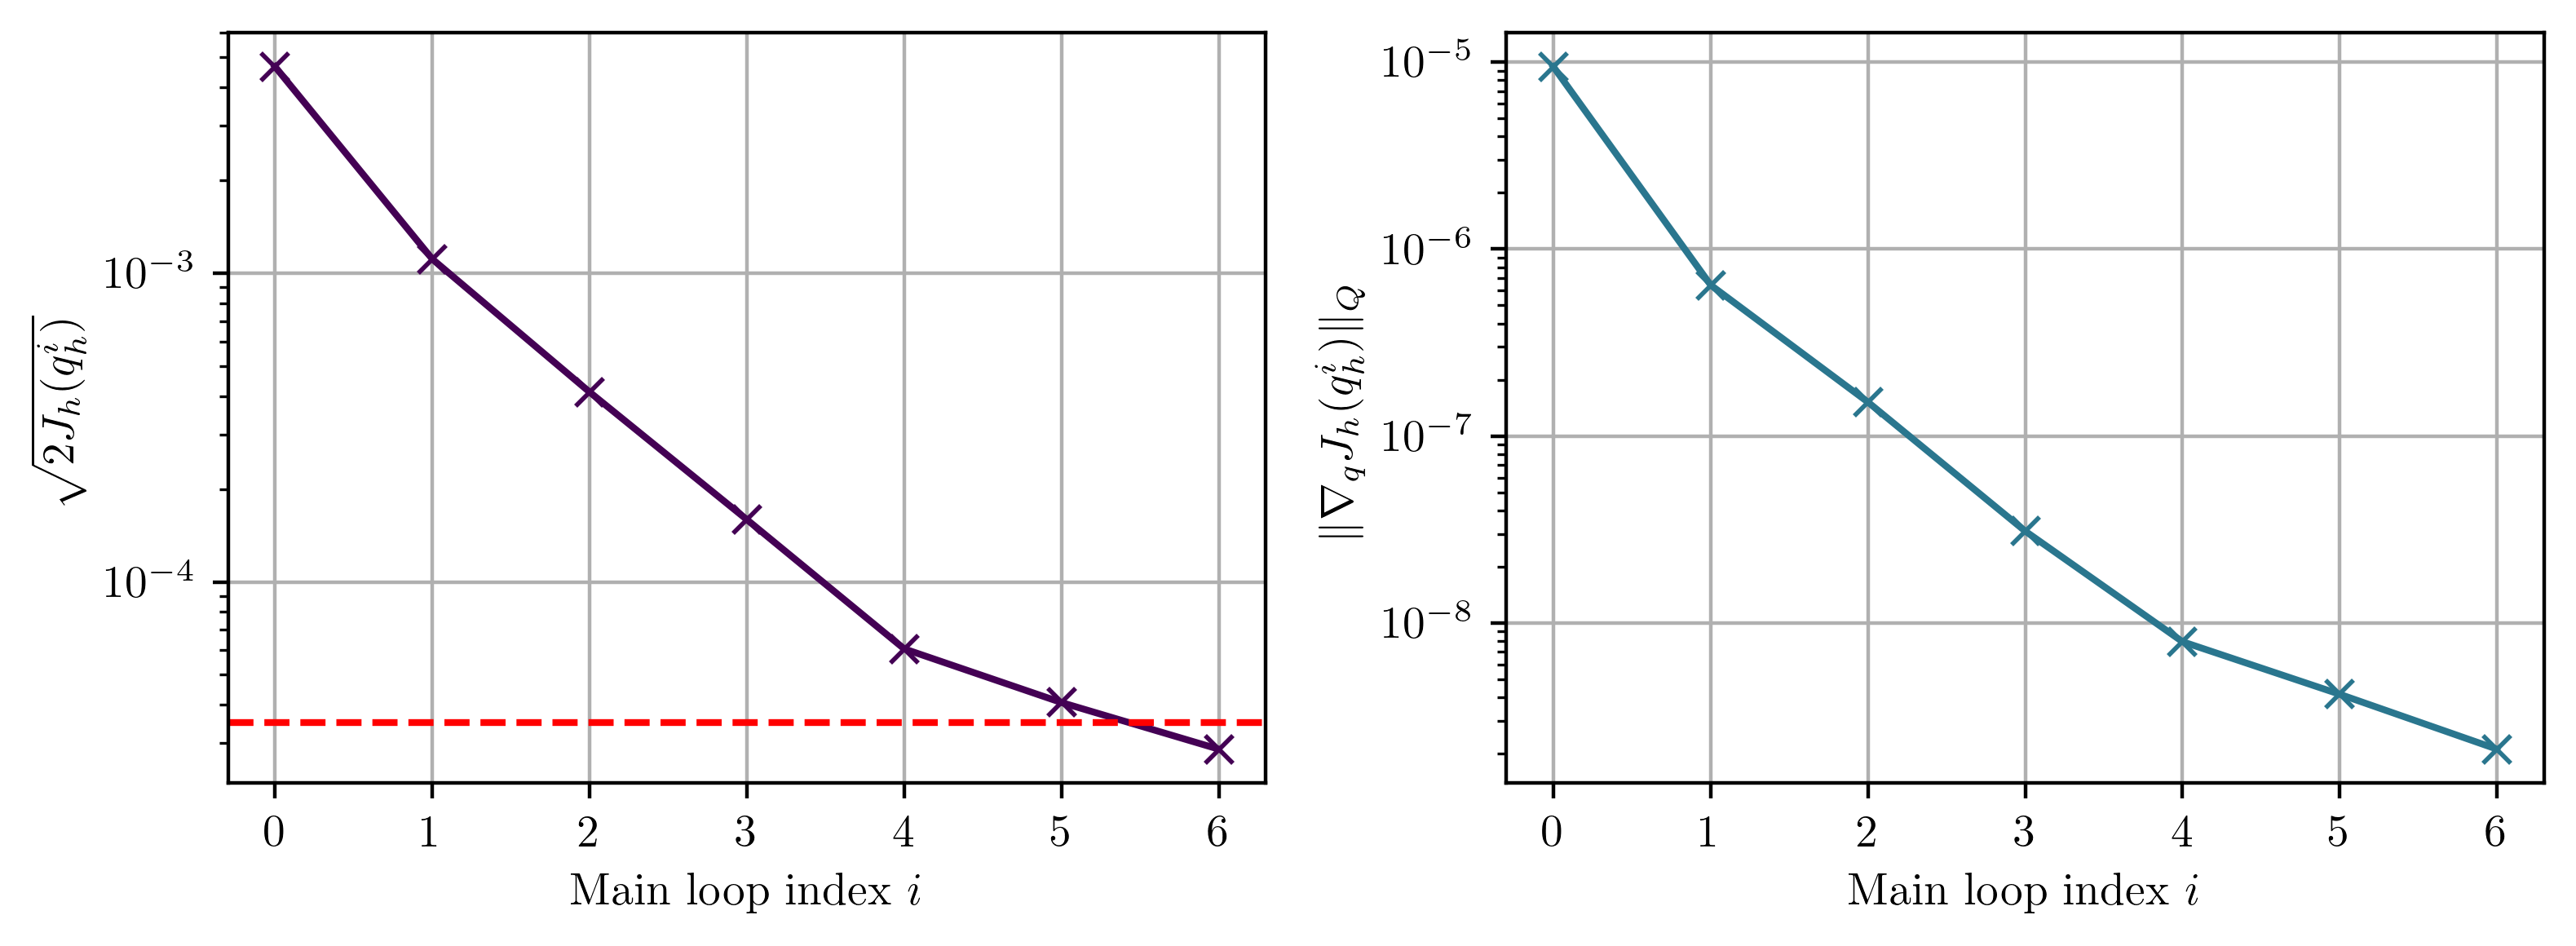

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
cmap = plt.get_cmap('viridis')

Js = np.array(data['J'])
norm_nabla_Js = np.array(data['norm_nabla_J'])
assert len(Js) == len(norm_nabla_Js)

ax[0].set_xlabel(r'$\textrm{Main loop index } i$')
ax[0].set_ylabel(r'$\sqrt{2J_h(q^i_h)}$')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].plot(np.sqrt(2 * Js), marker='x',color=cmap(0))

tau = optimizer_parameter['tau']
noise_level = optimizer_parameter['noise_level']
tol = optimizer_parameter['tol']
y = tau * noise_level + tol
ax[0].axhline(y=y, color='r', linestyle='--')


ax[1].set_xlabel(r'$\textrm{Main loop index } i$')
if setup['model_parameter']['q_time_dep']:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{Q^{K}}$')
else:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{Q}$')
    
ax[1].set_yscale('log')
ax[1].grid()
ax[1].plot(norm_nabla_Js, marker='x',color=cmap(100))
##############################


plt.tight_layout()
plt.show()

In [5]:
val = data['q'][-1]
rel = q_exact

if setup['model_parameter']['q_time_dep']:
    x = FOM.products['bochner_prod_Q'].apply2(rel-val, rel-val)[0,0]
    y = FOM.products['bochner_prod_Q'].apply2(rel, rel)[0,0]
else:
    x = FOM.products['prod_Q'].apply2(rel-val, rel-val)[0,0]
    y = FOM.products['prod_Q'].apply2(rel, rel)[0,0]
    
z = np.sqrt(x) / np.sqrt(y) * 100
print(f"{z:3.4} %")

11.04 %


In [6]:
#int(np.ceil(data['total_runtime']))

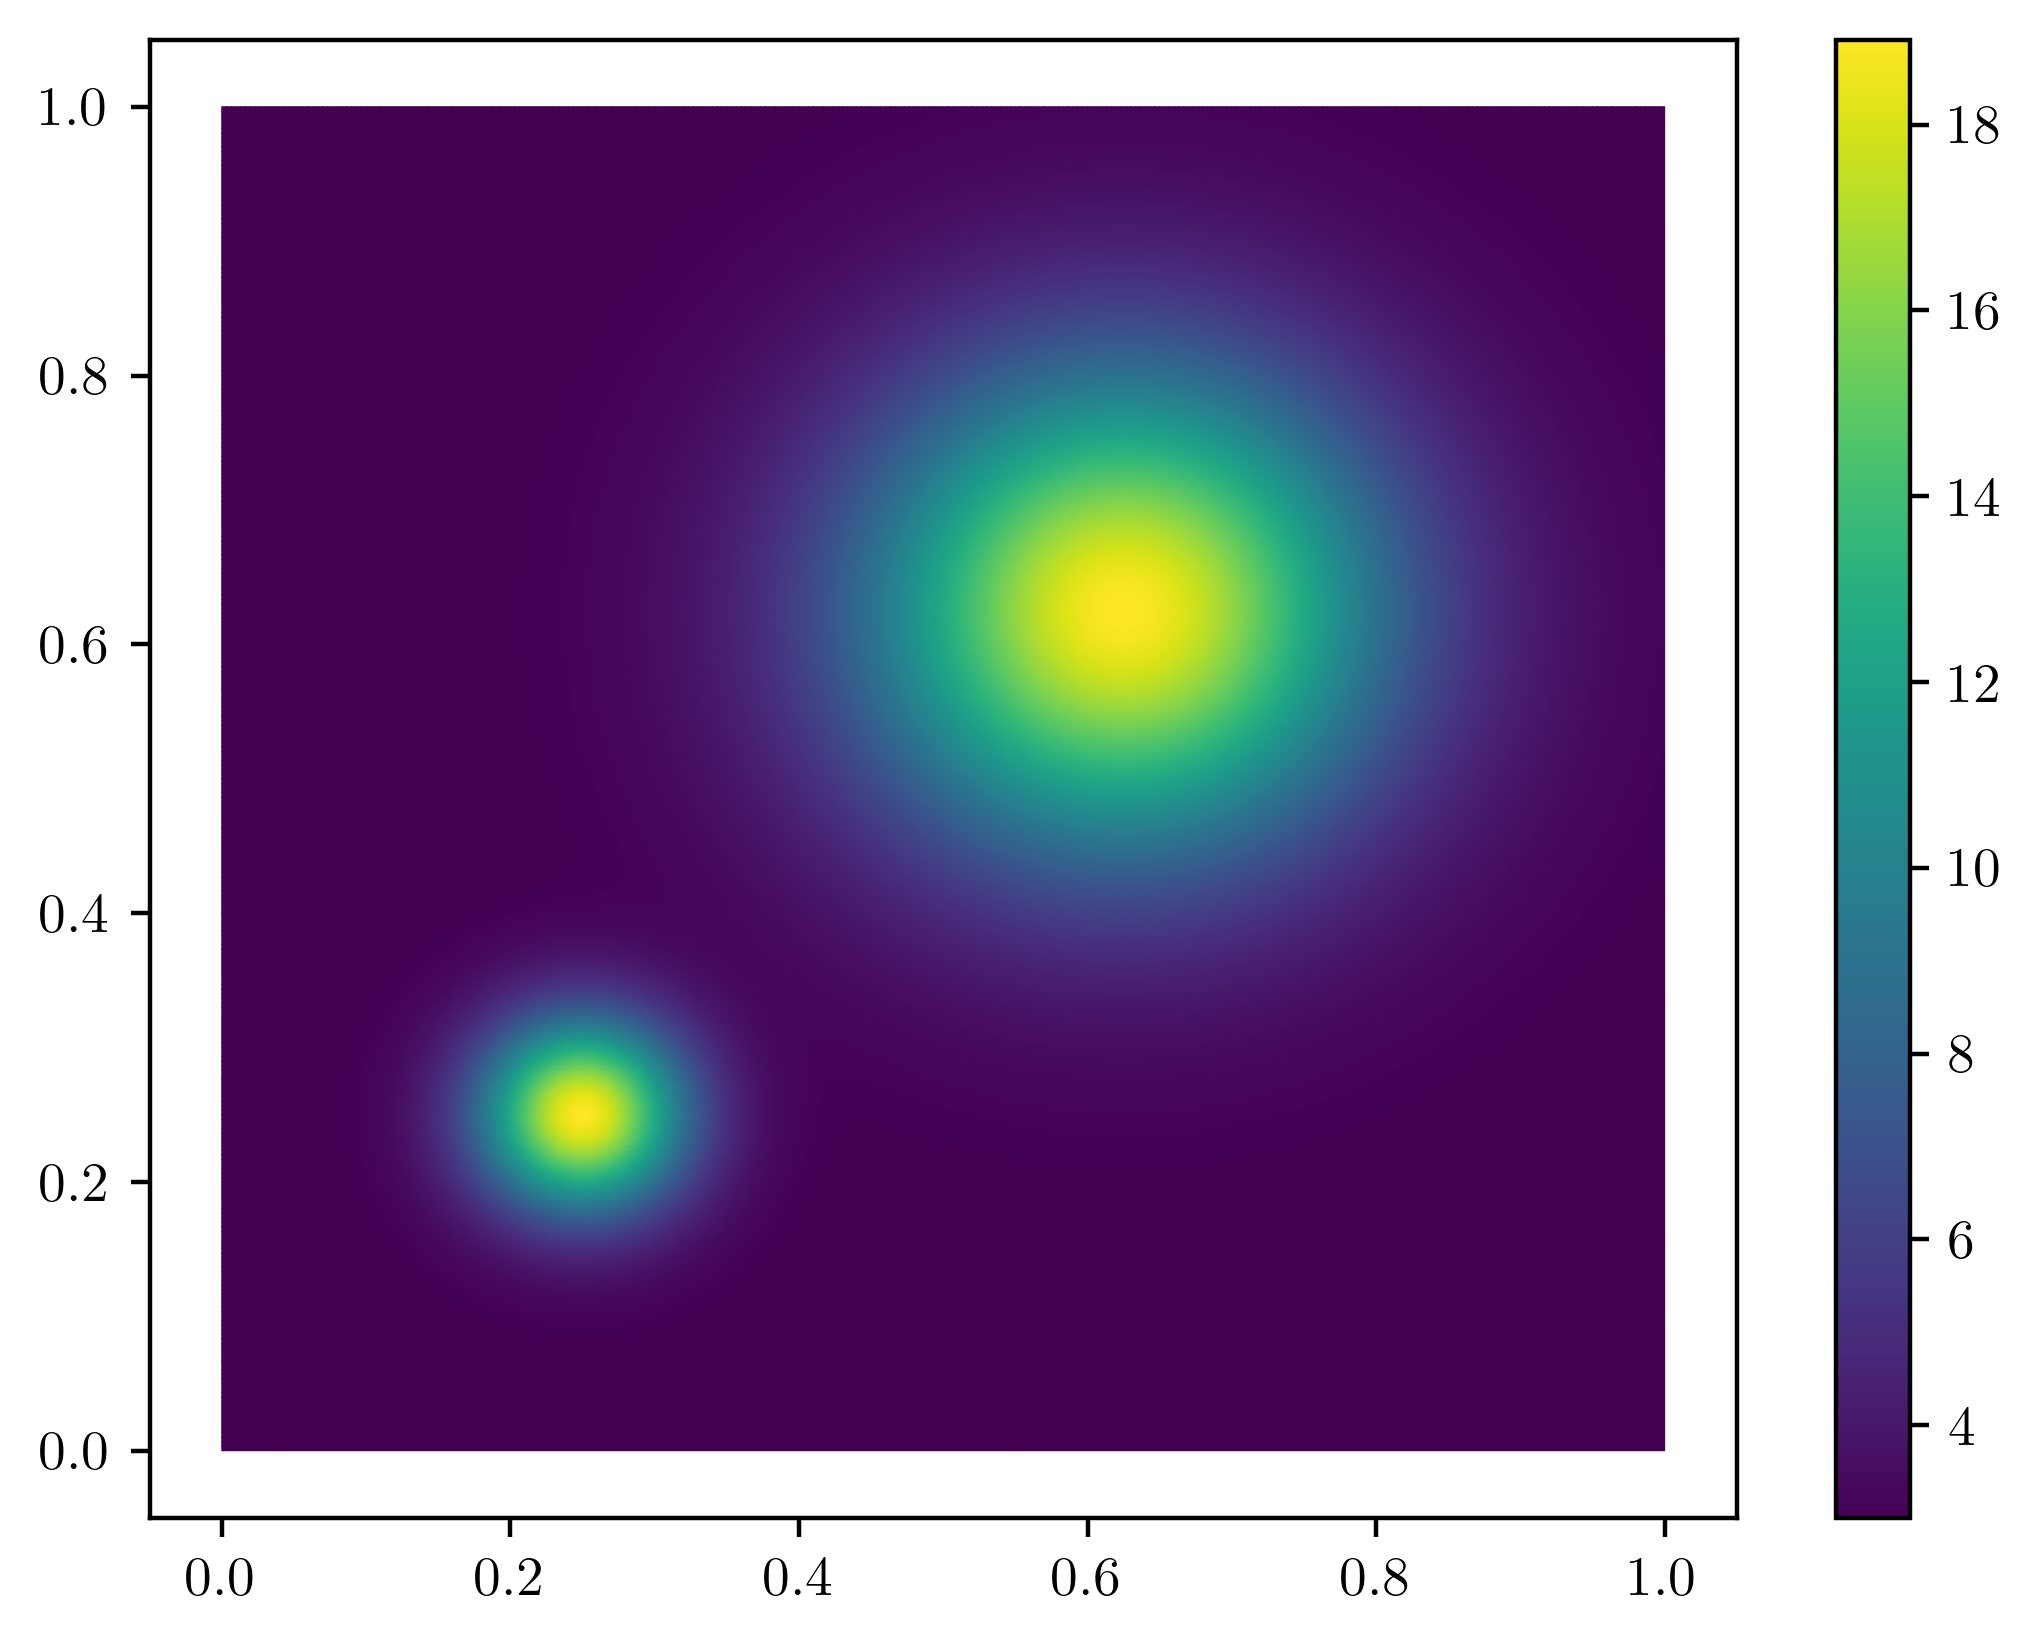

In [7]:
FOM.visualizer.visualize(setup['model_parameter']['q_exact'])

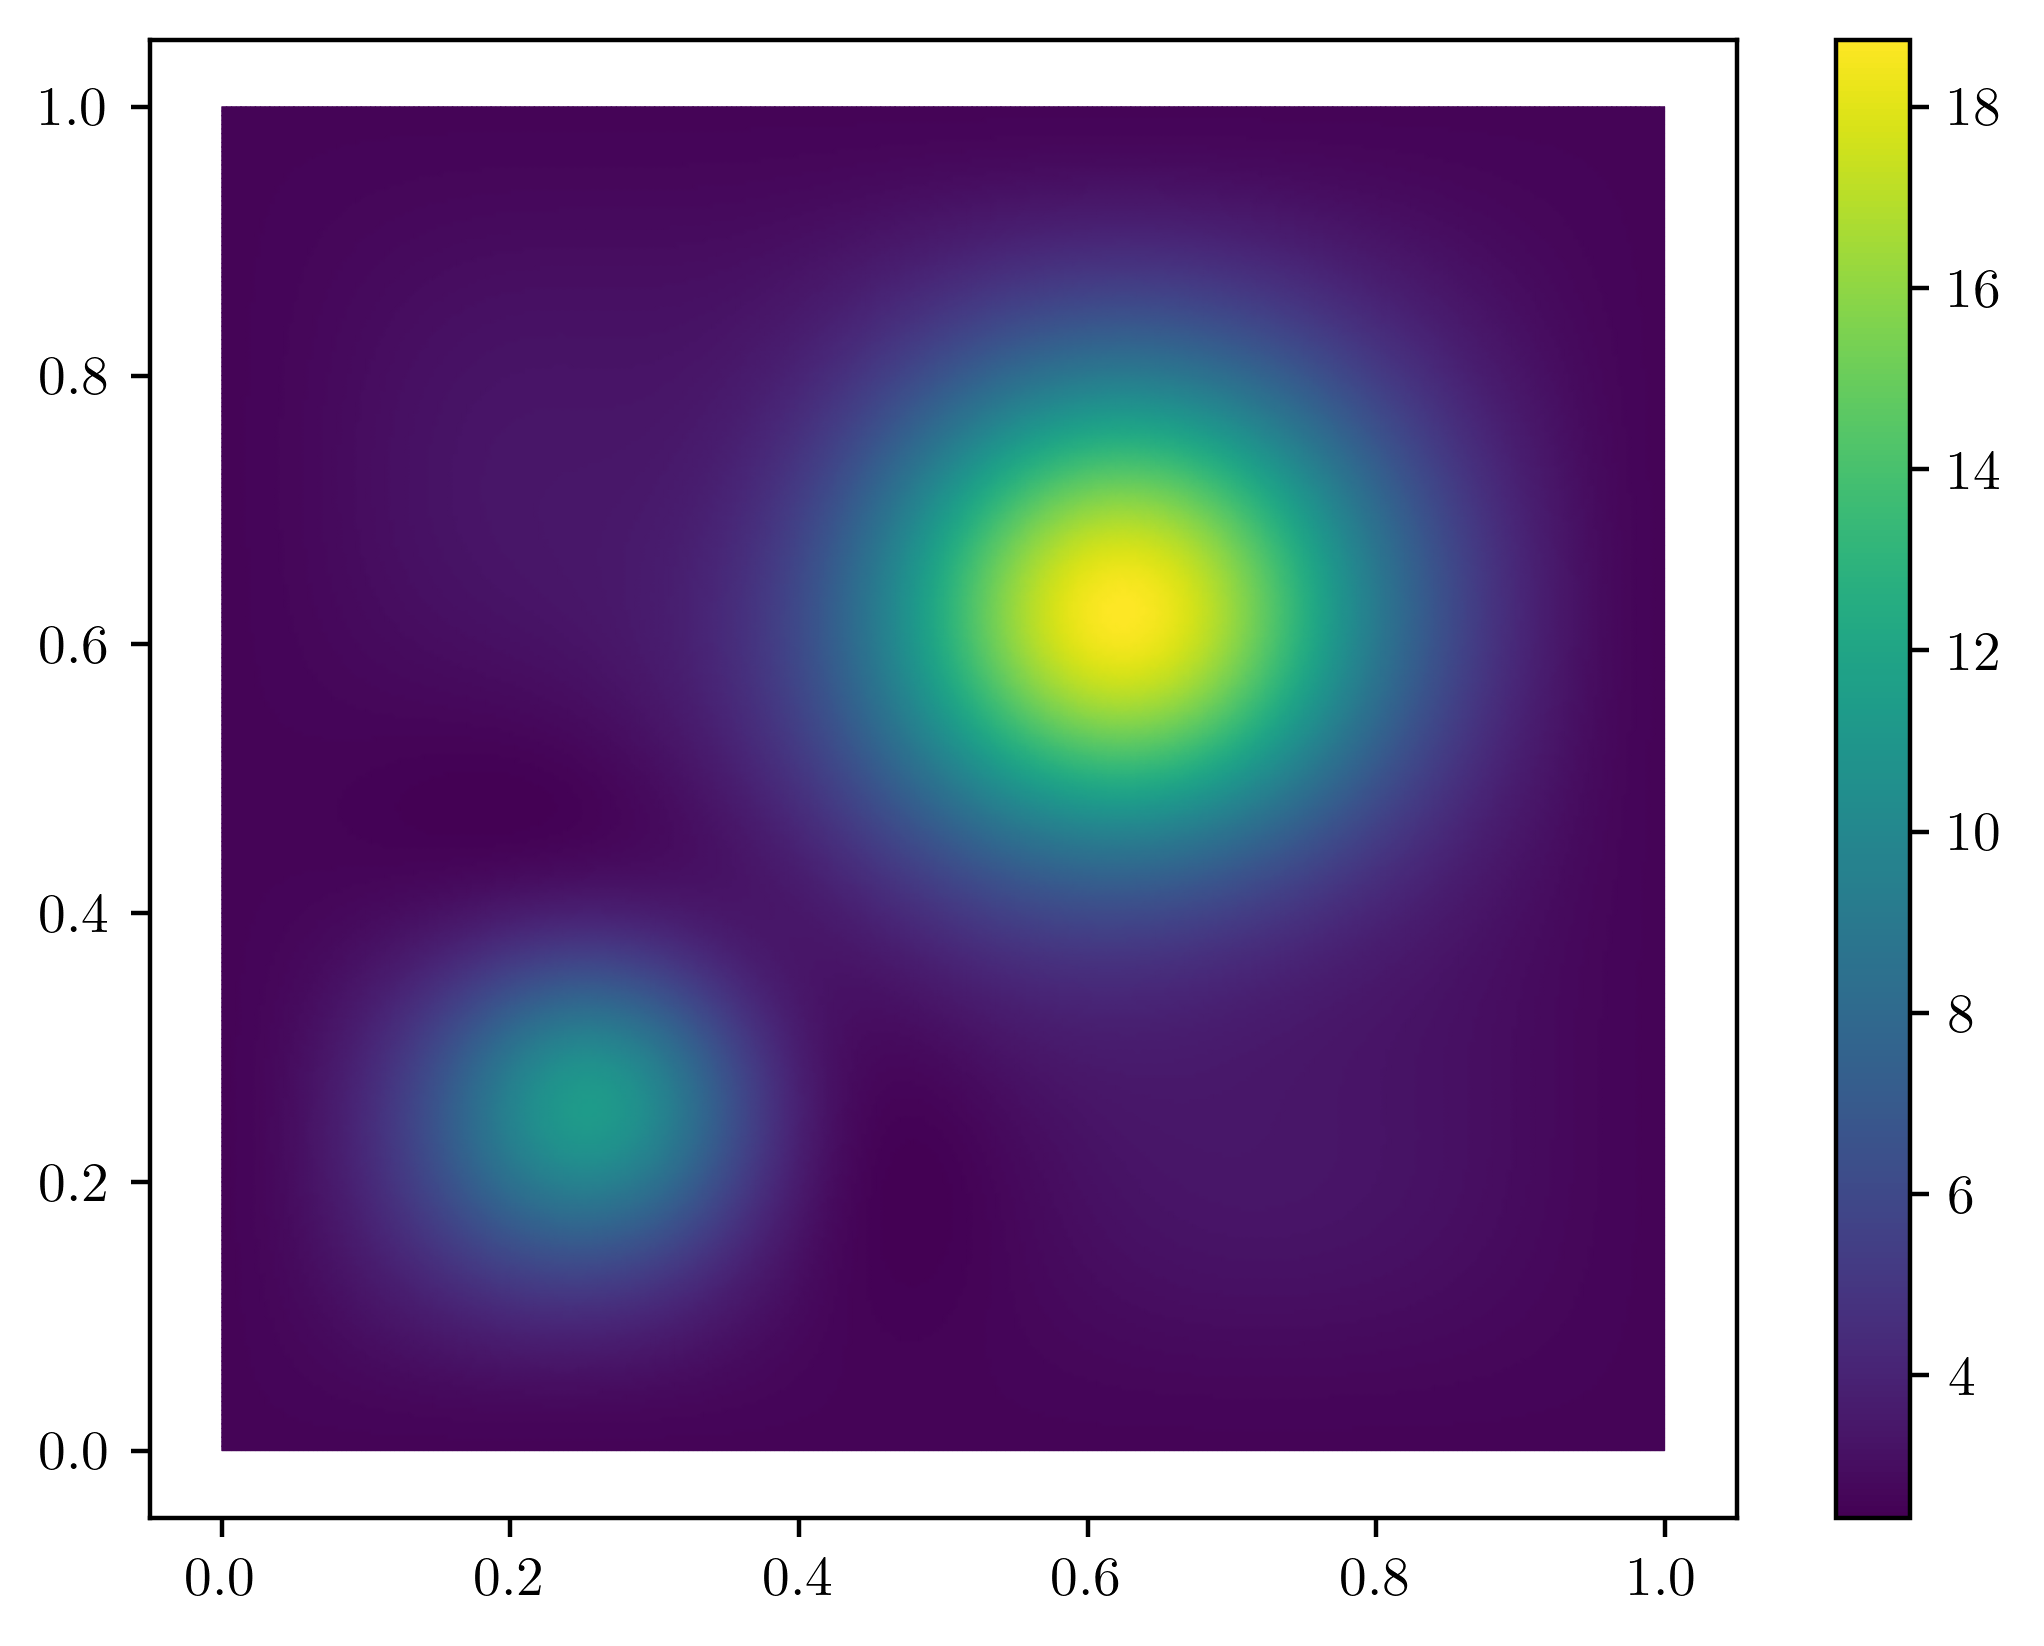

In [8]:
FOM.visualizer.visualize(data['q'][-1])

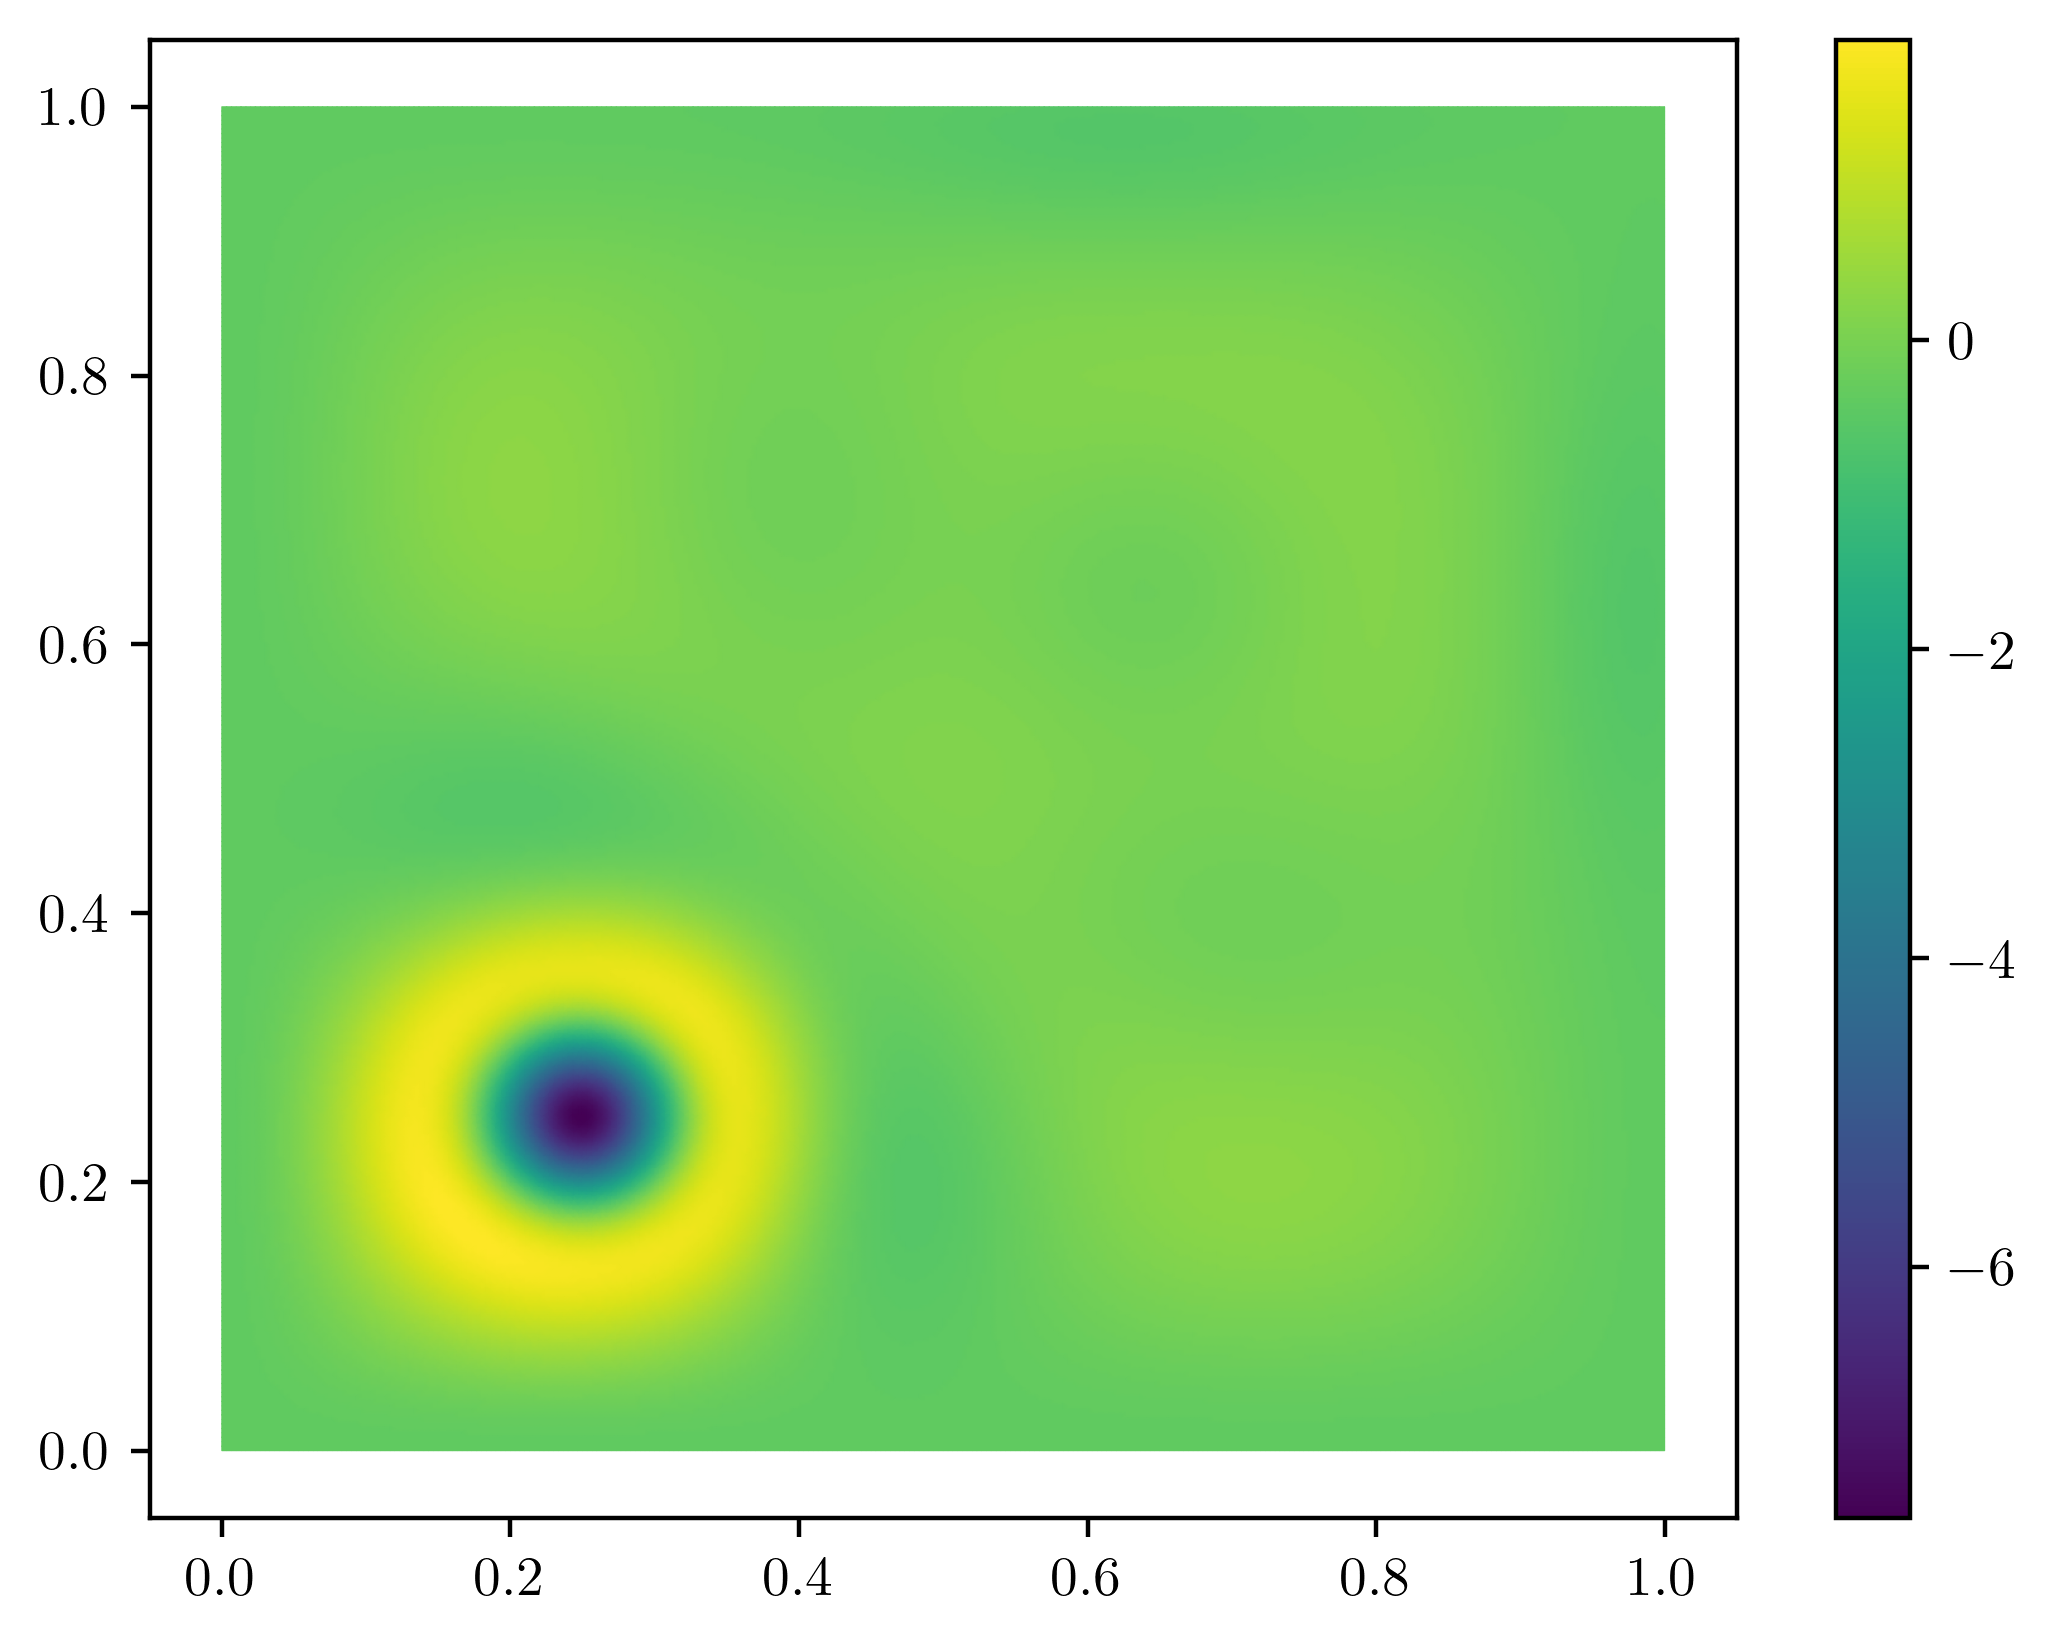

In [9]:
FOM.visualizer.visualize(data['q'][-1] - setup['model_parameter']['q_exact'])

In [13]:
data

{'q': [NumpyVectorArray(NumpyVectorSpace(90601, id='PARAM'), [[3. 3. 3. ... 3. 3. 3.]], _len=1),
  NumpyVectorArray(
      NumpyVectorSpace(90601, id='PARAM'),
      [[1.04741862 1.04741854 1.0474183  ... 1.04741815 1.0474185  1.04741863]],
      _len=1),
  NumpyVectorArray(
      NumpyVectorSpace(90601, id='PARAM'),
      [[2.84823093 2.84823086 2.84823065 ... 2.84822987 2.84823067 2.84823097]],
      _len=1),
  NumpyVectorArray(
      NumpyVectorSpace(90601, id='PARAM'),
      [[2.77871335 2.77871307 2.77871232 ... 2.77871213 2.77871303 2.77871336]],
      _len=1),
  NumpyVectorArray(
      NumpyVectorSpace(90601, id='PARAM'),
      [[2.69982663 2.69982619 2.69982497 ... 2.69982603 2.69982644 2.69982658]],
      _len=1),
  NumpyVectorArray(
      NumpyVectorSpace(90601, id='PARAM'),
      [[2.66463249 2.66463207 2.66463094 ... 2.66463194 2.66463231 2.66463244]],
      _len=1),
  NumpyVectorArray(
      NumpyVectorSpace(90601, id='PARAM'),
      [[2.60251988 2.60251952 2.60251854 ... 